## Simple Feature Engineering

What is feature engineering?  Building a feature from other features.

E.g. 
- Datetime -> is_weekend
- Age -> is_adult
    
Of course, this may be way more complicated.  We will attempt to make it very simple here.

In [2]:
! pip install pandas seaborn scikit-learn &> /dev/null

In [135]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='age', ylabel='fare'>

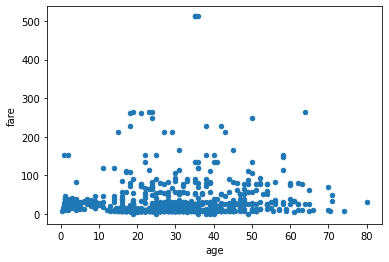

In [136]:
titanic.plot('age', 'fare', kind='scatter')

In [137]:
# Select features
select_features = ['survived', 'class', 'age', 'alone']
titanic = titanic[select_features]
# change datatypes
titanic['class'] = titanic['class'].astype('category')
titanic['survived'] = titanic['survived'].astype('bool')
titanic.head()

<ipython-input-137-62a286431ed7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['class'] = titanic['class'].astype('category')
<ipython-input-137-62a286431ed7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['survived'] = titanic['survived'].astype('bool')


,survived,class,age,alone
0,False,Third,22.0,False
1,True,First,38.0,False
2,True,Third,26.0,True
3,True,First,35.0,False
4,False,Third,35.0,True


In [138]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    bool    
 1   class     891 non-null    category
 2   age       714 non-null    float64 
 3   alone     891 non-null    bool    
dtypes: bool(2), category(1), float64(1)
memory usage: 9.8 KB


In [140]:
young_func = lambda age: age < 25
middleage_func = lambda age: (age > 25 and age < 55)
old_func = lambda age: age > 55

In [141]:
titanic['is_young'] = titanic['age'].apply(young_func).astype('bool')
titanic['is_middleage'] = titanic['age'].apply(middleage_func).astype('bool')
titanic['is_old'] = titanic['age'].apply(old_func).astype('bool')

<ipython-input-141-86ce7f9ce097>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['is_young'] = titanic['age'].apply(young_func).astype('bool')
<ipython-input-141-86ce7f9ce097>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['is_middleage'] = titanic['age'].apply(middleage_func).astype('bool')
<ipython-input-141-86ce7f9ce097>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [142]:
class_df = pd.get_dummies(titanic['class']).astype('bool')
class_df.head()

,First,Second,Third
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


In [143]:
titanic = titanic.join(class_df)

/home/peakbreaker/Documents/Clients/ciber/tut/presentation/ml_prod_tuts/cognitive_services/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/peakbreaker/Documents/Clients/ciber/tut/presentation/ml_prod_tuts/cognitive_services/venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


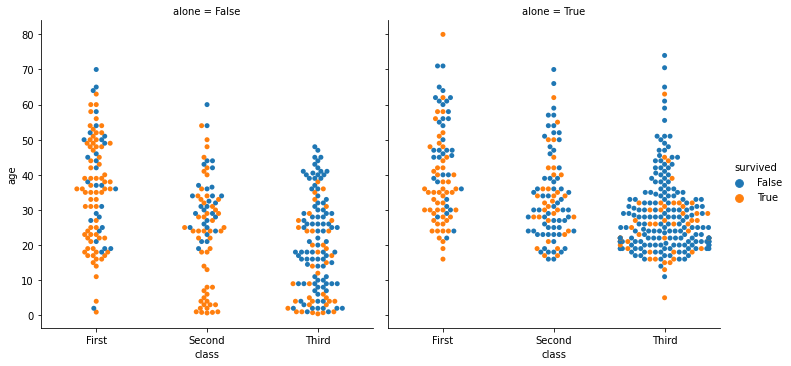

In [163]:
sns.catplot('class', 'age', hue='survived', kind='swarm', col='alone', data=titanic)

### Model

Lets build a simple model on the features we have made.

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = titanic.drop(['survived', 'class', 'age'], axis=1).astype('category')
y = titanic['survived']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                random_state=1)
X.head()

,alone,is_young,is_middleage,is_old,First,Second,Third
0,False,True,False,False,False,False,True
1,False,False,True,False,True,False,False
2,True,False,True,False,False,False,True
3,False,False,True,False,True,False,False
4,True,False,True,False,False,False,True


In [178]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [186]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
accuracy_score(ytest, y_model)

0.6367713004484304

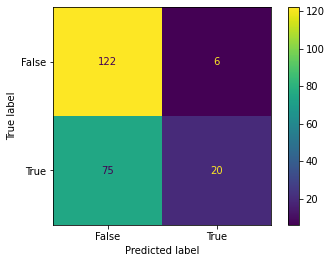

In [187]:
plot_confusion_matrix(model, Xtest, ytest)

In [189]:
print(classification_report(ytest, y_model))

              precision    recall  f1-score   support

       False       0.62      0.95      0.75       128
        True       0.77      0.21      0.33        95

    accuracy                           0.64       223
   macro avg       0.69      0.58      0.54       223
weighted avg       0.68      0.64      0.57       223



### Deployment

If we were to deploy this model, we would need:

1. The model, same as earlier example
2. The preprocessing functions for recreating our features

This can lead to a train/test skew.  If we do not calculate our features the same exact way, our model will interface on data different from what it has been trained on.

**This may lead to silent issues in our deploymen**